In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,log_loss,roc_auc_score,f1_score
%matplotlib notebook
%matplotlib inline

# Data Treatment

In [2]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.iloc[:6]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [4]:
data['TotalCharges']=data['TotalCharges'].apply(lambda i:np.NaN if i==' ' else float(i))

In [5]:
data=data.dropna()
data.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# EDA

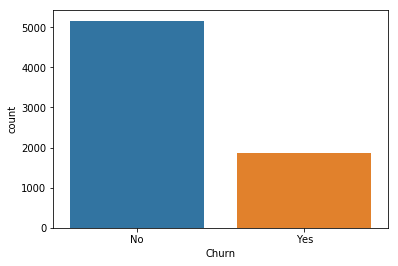

In [8]:
sns.countplot(x=data['Churn'])

Churn
No     316985.75
Yes    139130.85
Name: MonthlyCharges, dtype: float64


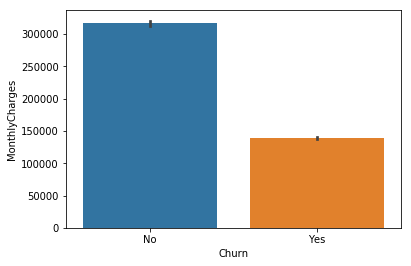

In [9]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
kerugian=df.groupby(by='Churn').sum()['MonthlyCharges']
print(kerugian)
sns.barplot(x=data['Churn'],y=data['MonthlyCharges'],estimator=sum)

#### From this chart we can see that Telco loss $13900 revenue from Churned Customer

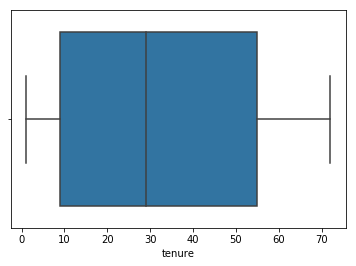

In [10]:
sns.boxplot(x='tenure',data=data)

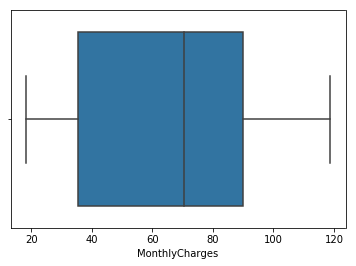

In [11]:
sns.boxplot(x='MonthlyCharges',data=data)

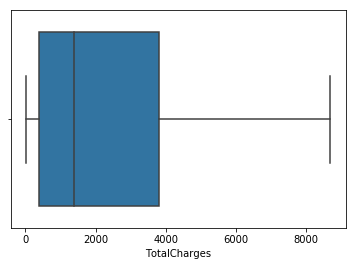

In [12]:
sns.boxplot(x='TotalCharges',data=data)

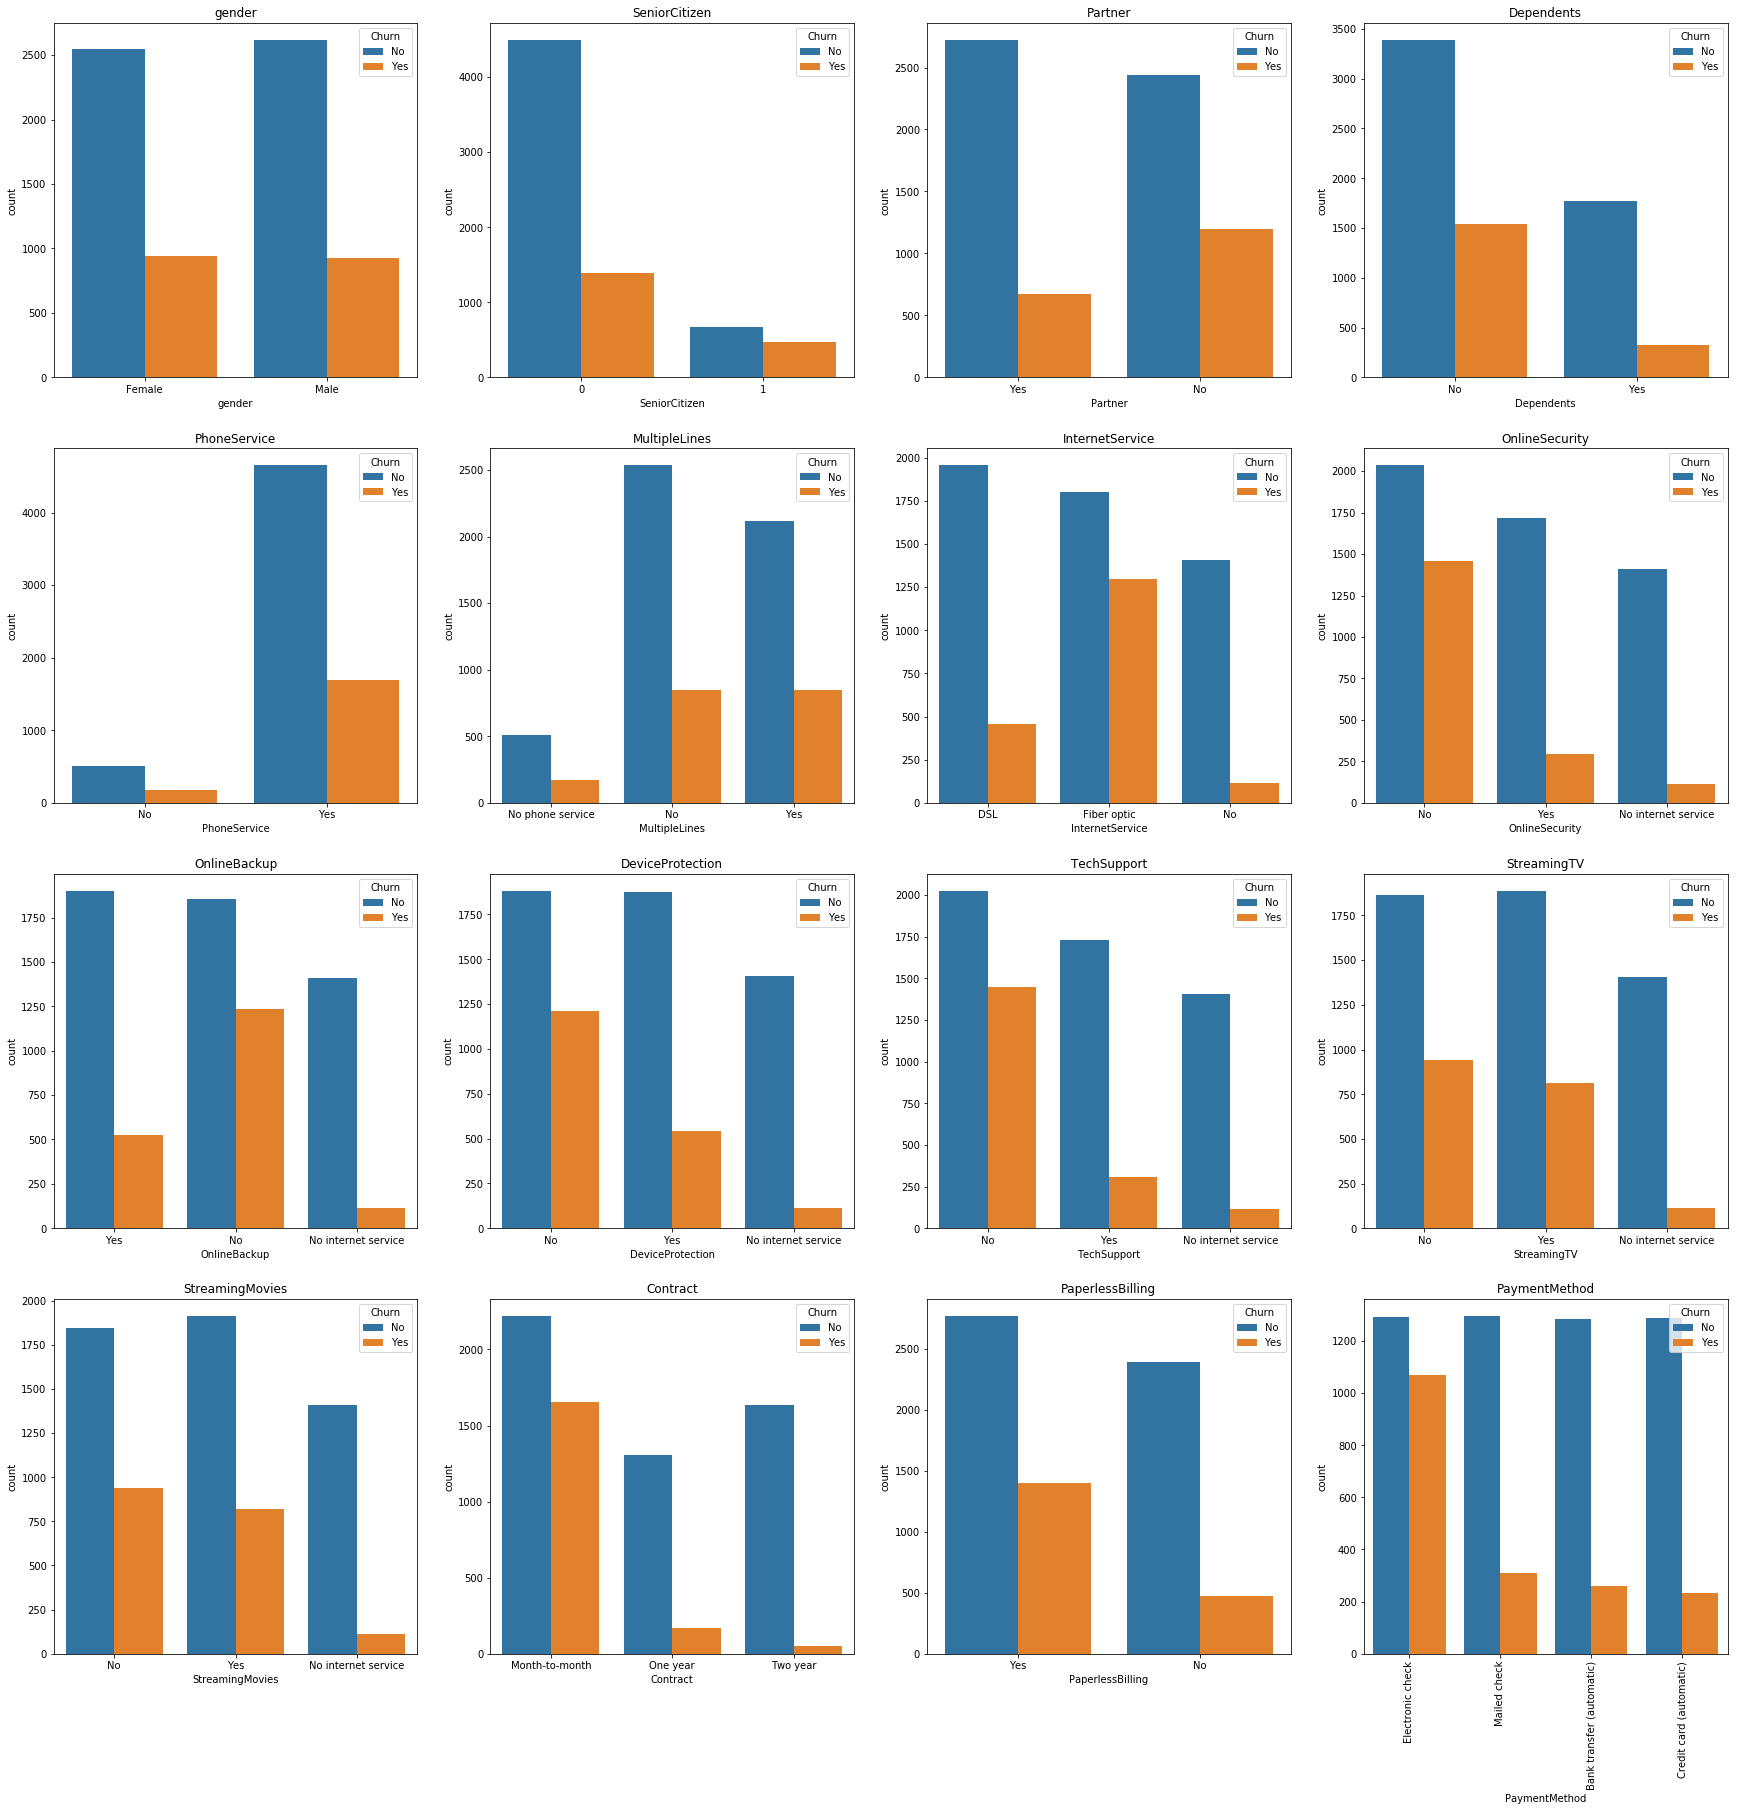

In [13]:
columnCat=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']
plt.figure(figsize=(30,30))
for item in range(len(columnCat)):
    plt.subplot(4,4,item+1)
    plt.title(columnCat[item])
    sns.countplot(x=data[columnCat[item]],hue=data['Churn'])
    if columnCat[item]=='PaymentMethod':
        plt.xticks(rotation=90)
plt.show()

# Countplot Summary
#### Gender=feature gender doesnt have correlation with Churn
#### Senior Citizen= Senior Citizen has imbalance data and almost half of senior citizen churned
#### Partner= Customer that doesnt have partner likely will churn although the correlation will be really small
#### Dependent=Customer that not dependent has higher chance to churn
## Telco Service
#### Phone Service=Imbalance data between customer that has phone service and not
#### multiple line=No Correlation with Churn
#### Internet service=Customer that use fiber optic has higher chance to churn
#### online security=Customer that doesnt have online security service tend to have high Churn rate
#### online backup=Customer that doesnt have online backup service tend to have high Churn rate
#### device protection=Customer that doesnt have device protection service tend to have high Churn rate
#### tech support=Customer that doesnt have tech support service tend to have high Churn rate
#### Streaming TV=No Correlation with Churn
#### streaming movies=No Correlation with Churn
#### contract=The longer the contract the churn rate tend to be decreased
#### paperless billing=customer that use paperless billing has higher churn rate
#### payment method=Customer that use electronic check has the highest churn rate than other payment method



## Feature that might have strong correlation with target(Churn):
#### payment method
#### Contract
#### online security
#### internet service
#### tech support 
#### Online Backup

In [14]:
label= preprocessing.LabelEncoder()
data['Churn']=label.fit_transform(data['Churn'])
data['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

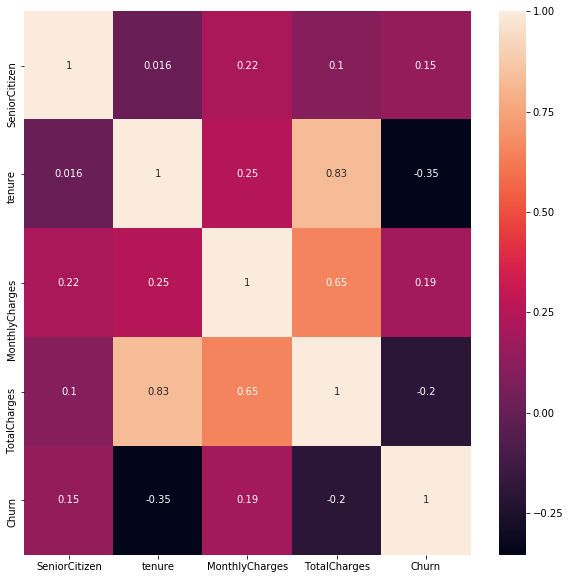

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

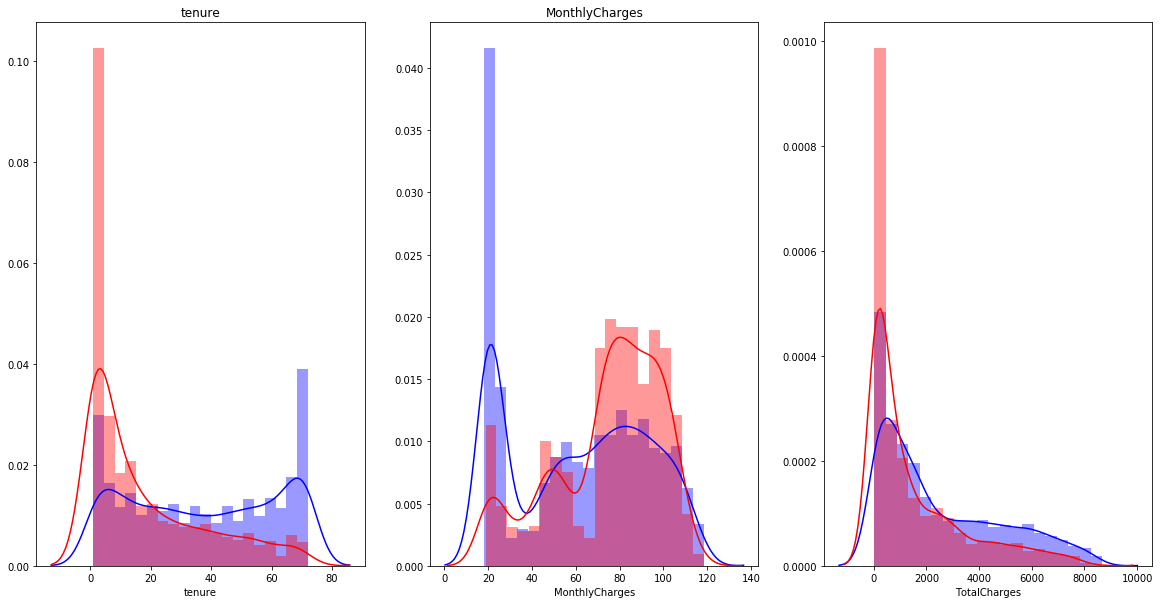

In [16]:
columnNum=['tenure','MonthlyCharges','TotalCharges']
plt.figure(figsize=(20,10))
for item in range(0,len(columnNum)):
    plt.title(columnNum[item-1])
    plt.subplot(1,3,item+1)
    sns.distplot(data[data['Churn']==0][columnNum[item]],kde=True,color='blue',bins=20)
    sns.distplot(data[data['Churn']==1][columnNum[item]],kde=True,color='red',bins=20)

# Distplot Summary
#### Tenure=New user will likely to churn
#### Monthly Charges= High monthly charges means higher churn rate
#### Total Charge=higher total charges of custommer smaller the chance of them to churn

Text(0, 0.5, 'Tenure')

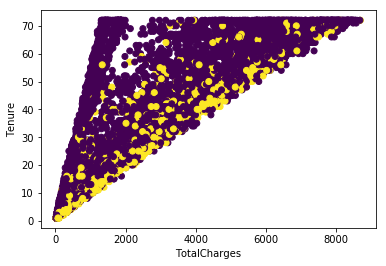

In [18]:
plt.scatter(data['TotalCharges'],data['tenure'],c=data['Churn'])
plt.xlabel('TotalCharges')
plt.ylabel('Tenure')

Text(0, 0.5, 'MonthlyCharges')

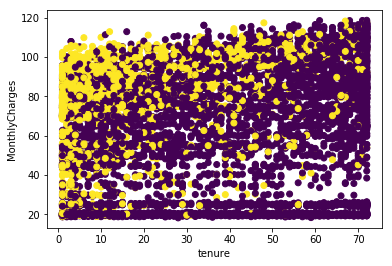

In [19]:
plt.scatter(data['tenure'],data['MonthlyCharges'],c=data['Churn'])
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')

Text(0, 0.5, 'MonthlyCharges')

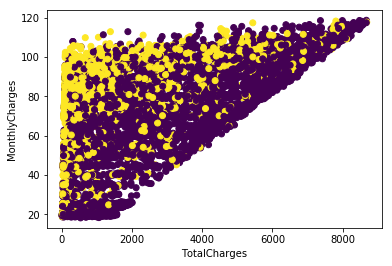

In [20]:
plt.scatter(data['TotalCharges'],data['MonthlyCharges'],c=data['Churn'])
plt.xlabel('TotalCharges')
plt.ylabel('MonthlyCharges')

#### Tenure and Monthly charges dont have any correlation
#### The longer Customer use telco service, total charges will increased
#### Client that has high monthly charge tend to have high total charges too

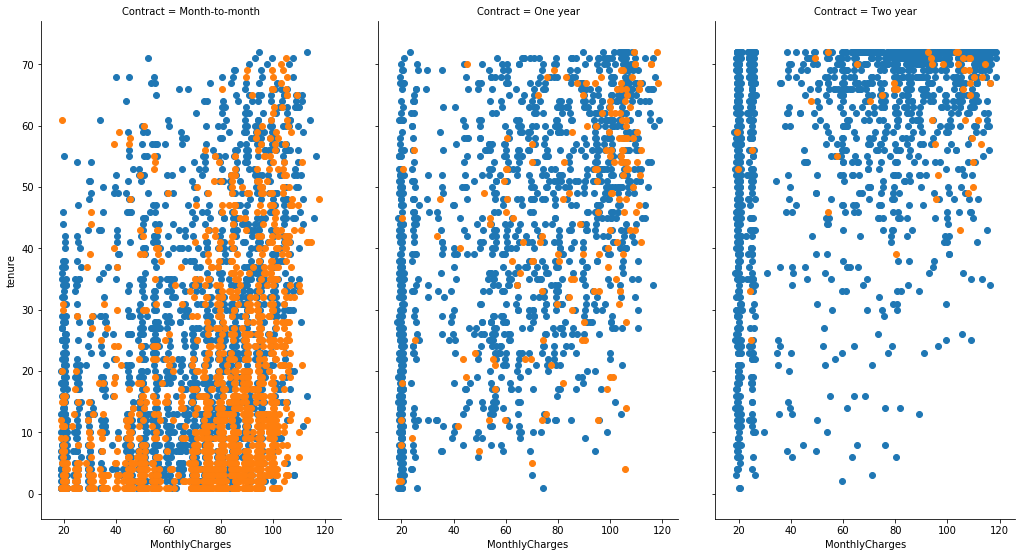

In [21]:
sns.FacetGrid(data,col='Contract',hue='Churn').map(plt.scatter,'MonthlyCharges','tenure').fig.set_size_inches(15,10)

#### Customer that has contract month to month and high monthly charges tend will be churn

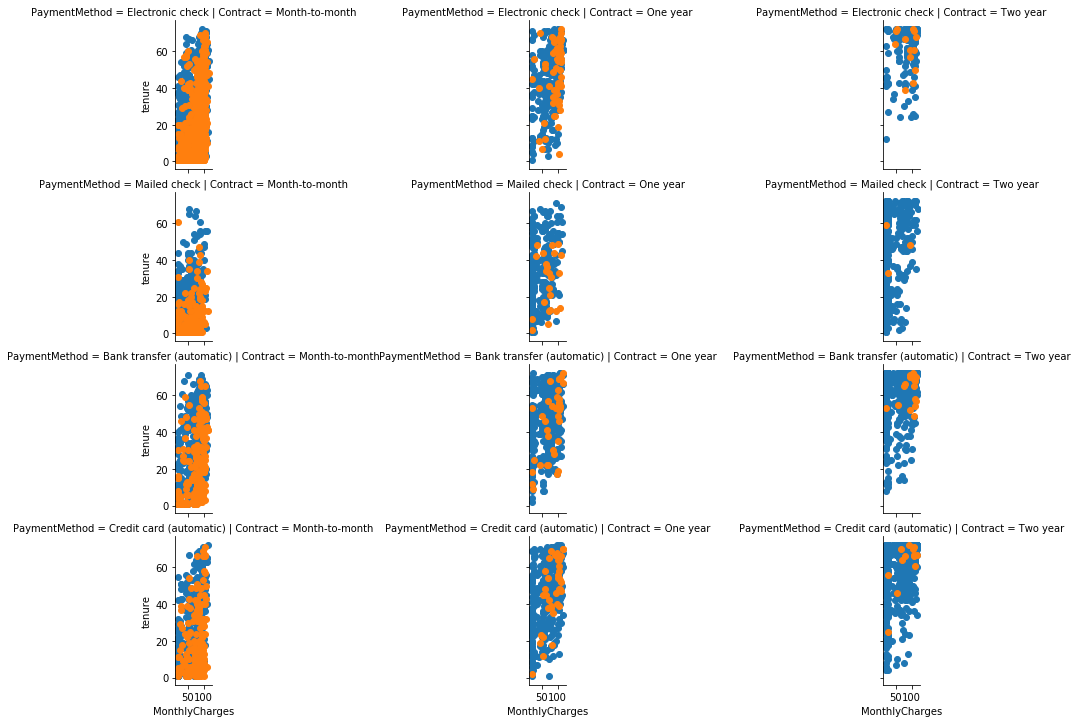

In [22]:
sns.FacetGrid(data,col='Contract',row='PaymentMethod',hue='Churn').map(plt.scatter,'MonthlyCharges','tenure').fig.set_size_inches(15,10)

#### Customer that has contract month to month tend to be churn but the highest number of churn customer is if they use electronic check as payment method

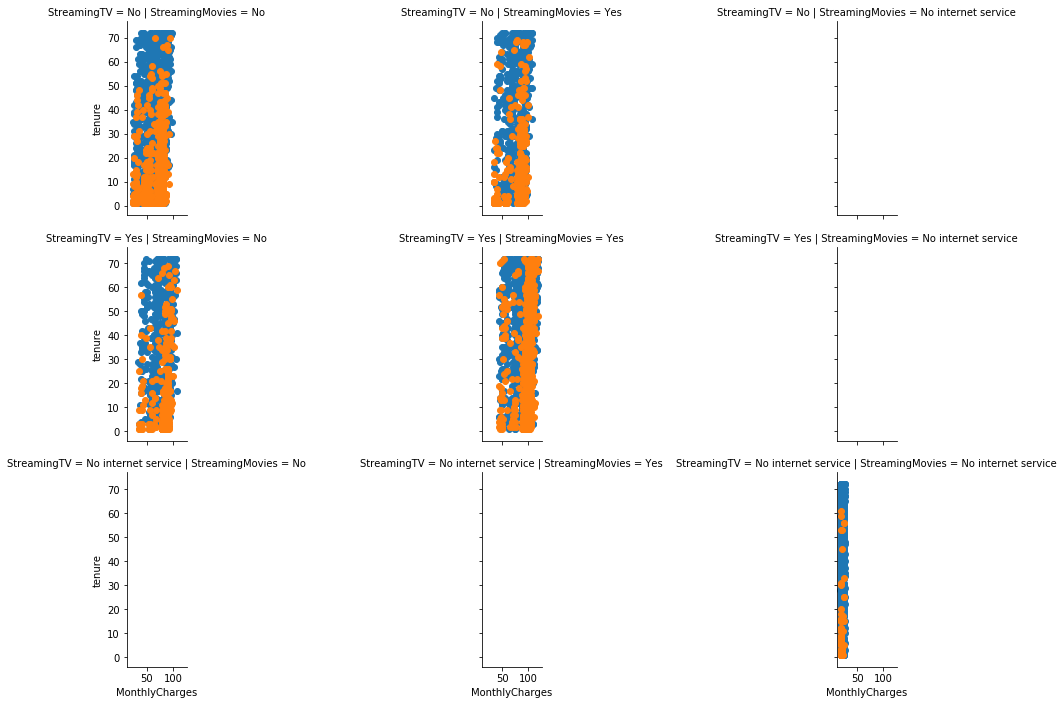

In [23]:
sns.FacetGrid(data,col='StreamingMovies',row='StreamingTV',hue='Churn').map(plt.scatter,'MonthlyCharges','tenure').fig.set_size_inches(15,10)

In [24]:
print('Mean Monthly charges internet DSL with streaming movies and TV',data[(data['InternetService']=='DSL')&(data['OnlineBackup']=='No')&(data['DeviceProtection']=='No')&(data['OnlineSecurity']=='No')&(data['TechSupport']=='No')&(data['StreamingMovies']=='Yes')&(data['StreamingTV']=='Yes')]['MonthlyCharges'].mean())
print('Mean Monthly charges internet  with streaming movies and TV',data[(data['InternetService']=='Fiber optic')&(data['OnlineBackup']=='No')&(data['DeviceProtection']=='No')&(data['OnlineSecurity']=='No')&(data['TechSupport']=='No')&(data['StreamingMovies']=='Yes')&(data['StreamingTV']=='Yes')]['MonthlyCharges'].mean())
print(data.groupby(by=['InternetService','OnlineBackup','OnlineSecurity','TechSupport','StreamingMovies','StreamingTV','DeviceProtection'])['MonthlyCharges'].mean())
print(data[(data['InternetService']=='Fiber optic')&(data['OnlineBackup']=='No')&(data['DeviceProtection']=='No')&(data['OnlineSecurity']=='No')&(data['TechSupport']=='No')&(data['StreamingMovies']=='Yes')&(data['StreamingTV']=='No')]['MonthlyCharges'].mean())

Mean Monthly charges internet DSL with streaming movies and TV 54.50810810810811
Mean Monthly charges internet  with streaming movies and TV 92.92845303867405
InternetService  OnlineBackup         OnlineSecurity       TechSupport          StreamingMovies      StreamingTV          DeviceProtection   
DSL              No                   No                   No                   No                   No                   No                      40.277721
                                                                                                                          Yes                     46.567000
                                                                                                     Yes                  No                      49.843902
                                                                                                                          Yes                     53.089474
                                                                           

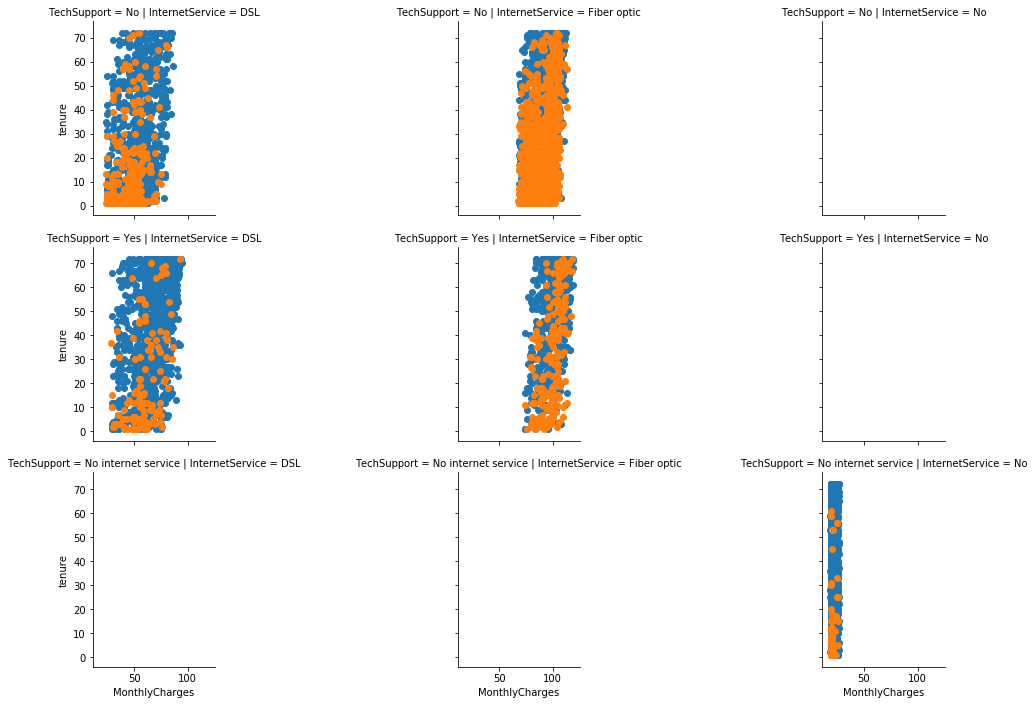

In [25]:
sns.FacetGrid(data,col='InternetService',row='TechSupport',hue='Churn').map(plt.scatter,'MonthlyCharges','tenure').fig.set_size_inches(15,10)

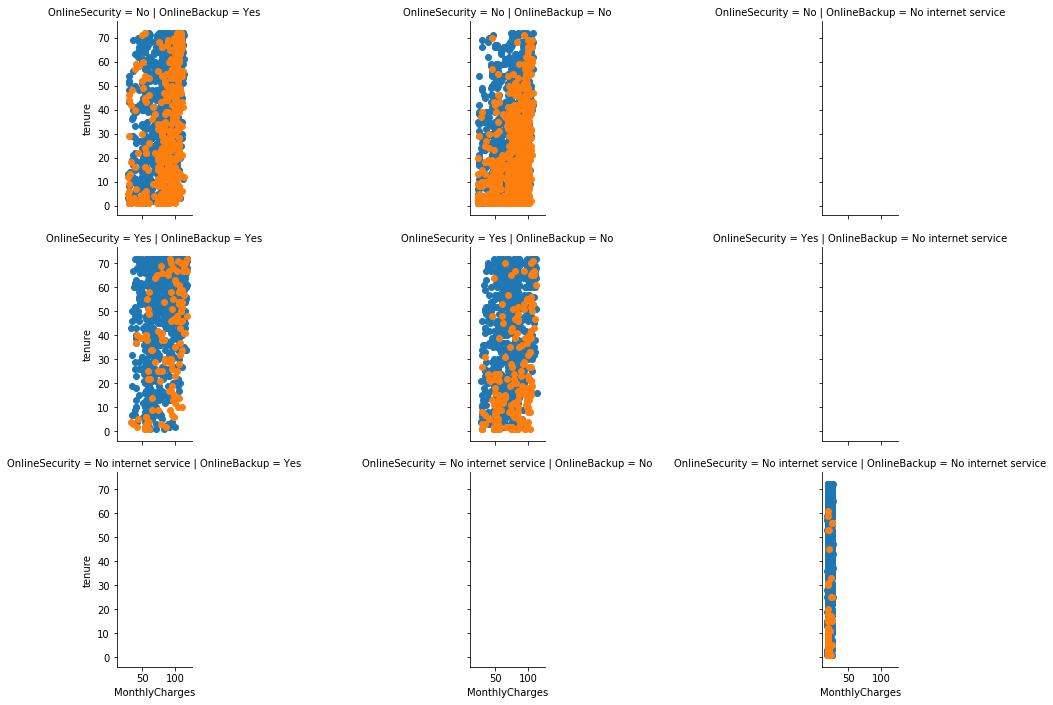

In [26]:
sns.FacetGrid(data,col='OnlineBackup',row='OnlineSecurity',hue='Churn').map(plt.scatter,'MonthlyCharges','tenure').fig.set_size_inches(15,10)

# Conclusion From EDA
### payment method : telco need to reduce payment method using electronic check
### Contract : telco need to reduce customer with month to month contract
## Telco Feature
#### Fiber Optic really expensive,either decrease the cost or focus on DSL Service
#### Telco need to increase the number of customer that using services below:
#### online security
#### internet service
#### tech support
#### Online Backup


# Machine Learning

In [27]:
for item in columnCat:
    data[item]=label.fit_transform(data[item])

In [28]:
data=data.drop('customerID',axis=1)
data.iloc[:6]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1


# Train Test Split

In [29]:
xtrain,xtes,ytrain,ytes=train_test_split(data.drop('Churn',axis=1),data['Churn'],test_size=0.30,random_state=101)

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc=RandomForestClassifier(n_estimators=100,random_state=50)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

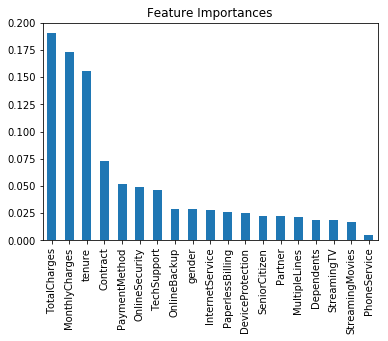

In [32]:
coef1=pd.Series(rfc.feature_importances_,xtrain.columns).sort_values(ascending=False)
coef1.plot(kind='bar',title='Feature Importances')

In [33]:
predictTesRFC=rfc.predict(xtes)
predictProbRFC=rfc.predict_proba(xtes)

In [34]:
conRFC=pd.DataFrame(data=confusion_matrix(ytes,predictTesRFC),columns=['P No','P Yes'],index=['A No','A Yes']);
conRFC

,P No,P Yes
A No,1410,170
A Yes,267,263


In [35]:
print(classification_report(ytes,predictTesRFC))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1580
           1       0.61      0.50      0.55       530

    accuracy                           0.79      2110
   macro avg       0.72      0.69      0.71      2110
weighted avg       0.78      0.79      0.79      2110



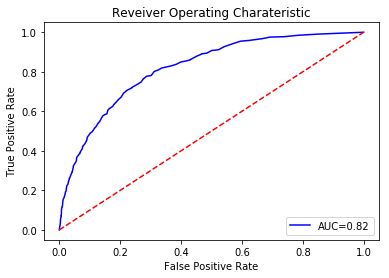

In [36]:
preds=predictProbRFC[:,1]
fpr,tpr,threshold=roc_curve(ytes,preds)
roc_auc=auc(fpr,tpr)

plt.title('Reveiver Operating Charateristic')
plt.plot(fpr,tpr,'b',label='AUC={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
print('log_loss=',roc_auc_score(ytes,predictProbRFC[:,1]))

log_loss= 0.8179699068545497


# Decision Tree

In [38]:
from sklearn import tree

In [39]:
DCT=tree.DecisionTreeClassifier()
DCT.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

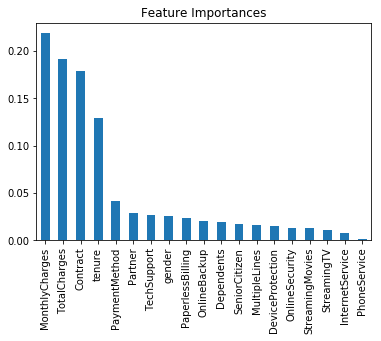

In [40]:
coef1=pd.Series(DCT.feature_importances_,xtrain.columns).sort_values(ascending=False)
coef1.plot(kind='bar',title='Feature Importances')

In [41]:
predictTesDCT=rfc.predict(xtes)
predictProbDCT=rfc.predict_proba(xtes)

In [42]:
conDCT=pd.DataFrame(data=confusion_matrix(ytes,predictTesDCT),columns=['P No','P Yes'],index=['A No','A Yes']);
conDCT

,P No,P Yes
A No,1410,170
A Yes,267,263


In [43]:
print(classification_report(ytes,predictTesDCT))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1580
           1       0.61      0.50      0.55       530

    accuracy                           0.79      2110
   macro avg       0.72      0.69      0.71      2110
weighted avg       0.78      0.79      0.79      2110



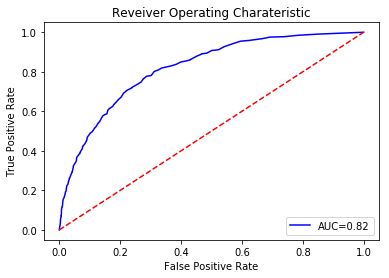

In [44]:
preds=predictProbDCT[:,1]
fpr,tpr,threshold=roc_curve(ytes,preds)
roc_auc=auc(fpr,tpr)

plt.title('Reveiver Operating Charateristic')
plt.plot(fpr,tpr,'b',label='AUC={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
print('log_loss=',log_loss(ytes,predictProbDCT[:,1]))

log_loss= 0.5460289752569409


# XG Boost

In [46]:
import xgboost as xgb

In [47]:
xgb=xgb.XGBClassifier()
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

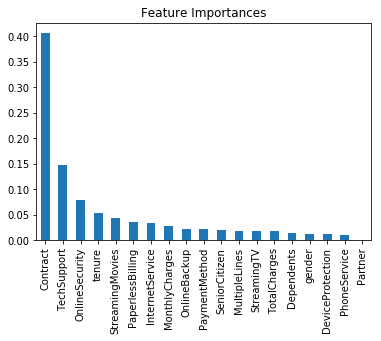

In [48]:
coef1=pd.Series(xgb.feature_importances_,xtrain.columns).sort_values(ascending=False)
coef1.plot(kind='bar',title='Feature Importances')

In [49]:
predictTesXGB=xgb.predict(xtes)
predictProbXGB=xgb.predict_proba(xtes)

In [50]:
conXG=pd.DataFrame(data=confusion_matrix(ytes,predictTesXGB),columns=['P No','P Yes'],index=['A No','A Yes']);
conXG

,P No,P Yes
A No,1432,148
A Yes,253,277


In [51]:
print(classification_report(ytes,predictTesXGB))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1580
           1       0.65      0.52      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



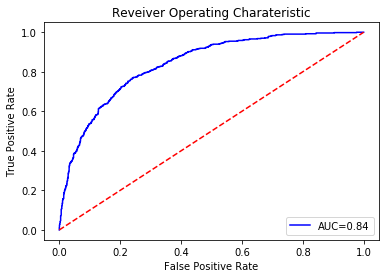

In [52]:
preds=predictProbXGB[:,1]
fpr,tpr,threshold=roc_curve(ytes,preds)
roc_auc=auc(fpr,tpr)

plt.title('Reveiver Operating Charateristic')
plt.plot(fpr,tpr,'b',label='AUC={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
print('log_loss=',roc_auc_score(ytes,predictProbXGB[:,1]))

log_loss= 0.8402668975400048


# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logmodel = LogisticRegression(solver='lbfgs',max_iter=1000)
logmodel.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
predictTesLR=logmodel.predict(xtes)
predictProbLR=logmodel.predict_proba(xtes)

In [57]:
con=pd.DataFrame(data=confusion_matrix(ytes,predictTesLR),columns=['P No','P Yes'],index=['A No','A Yes']);
con

,P No,P Yes
A No,1400,180
A Yes,234,296


In [58]:
print(classification_report(ytes,predictTesLR))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1580
           1       0.62      0.56      0.59       530

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.80      0.80      2110



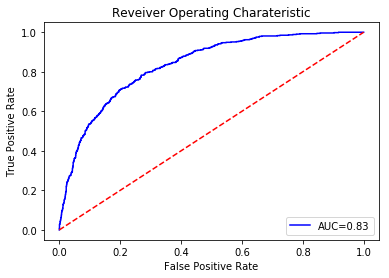

In [59]:
preds=predictProbLR[:,1]
fpr,tpr,threshold=roc_curve(ytes,preds)
roc_auc=auc(fpr,tpr)

plt.title('Reveiver Operating Charateristic')
plt.plot(fpr,tpr,'b',label='AUC={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [60]:
from sklearn.model_selection import KFold

K=10
kf=KFold(n_splits=K,shuffle=True,random_state=42)
target=data['Churn']
data=data.drop('Churn',axis=1)

In [61]:
def calc_train_error(xtrain,ytrain,model):
    predictions=model.predict(xtrain)
    predictProba=model.predict_proba(xtrain)
    accuracy=accuracy_score(ytrain,predictions)
    f1=f1_score(ytrain,predictions,average='macro')
    roc_auc=roc_auc_score(ytrain,predictProba[:,1])
    logloss=log_loss(ytrain,predictProba[:,1])
    report=classification_report(ytrain,predictions)
    return {
        'report':report,
        'f1':f1,
        'roc':roc_auc,
        'accuracy':accuracy,
        'logloss':logloss
    }
def calc_validation_error(xtes,ytes,model):
    predictions=model.predict(xtes)
    predictProba=model.predict_proba(xtes)
    accuracy=accuracy_score(ytes,predictions)
    f1=f1_score(ytes,predictions,average='macro')
    roc_auc=roc_auc_score(ytes,predictProba[:,1])
    logloss=log_loss(ytes,predictProba[:,1])
    report=classification_report(ytes,predictions)
    return {
        'report':report,
        'f1':f1,
        'roc':roc_auc,
        'accuracy':accuracy,
        'logloss':logloss
    }
def calc_metrics(xtrain,ytrain,xtes,ytes,model):
    model.fit(xtrain,ytrain)
    train_error=calc_train_error(xtrain,ytrain,model)
    validation_error=calc_validation_error(xtes,ytes,model)
    return train_error,validation_error


In [62]:
train_errors=[]
validation_errors=[]
for train_index,val_index in kf.split(data,target):
    #Split Data
    xtrain,x_val=data.iloc[train_index],data.iloc[val_index]
    ytrain,y_val=target.iloc[train_index],target.iloc[val_index]
    
    print(len(x_val),len(xtrain)+len(x_val))
    
    
    #calculate errors
    train_error,val_error=calc_metrics(xtrain,ytrain,x_val,y_val,logmodel)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)
dfLR = []
for tr,val in zip(train_errors, validation_errors):
    dfLR.append([tr['f1'], val['f1'], tr['roc'], val['roc'],
                  tr['logloss'], val['logloss'],tr['accuracy'], val['accuracy']])
dfLR = pd.DataFrame(dfLR, columns=['f1 train','f1 test','Train ROC AUC','Test ROC AUC',
                                       'Train log_loss','Test log_loss','Train accuracy',
                                       'Test accuracy'])
dfLR

704 7032
704 7032
703 7032
703 7032
703 7032
703 7032
703 7032
703 7032
703 7032
703 7032


,f1 train,f1 test,Train ROC AUC,Test ROC AUC,Train log_loss,Test log_loss,Train accuracy,Test accuracy
0,0.741188,0.721062,0.846870,0.837006,0.416271,0.432876,0.807206,0.791193
1,0.736875,0.712097,0.848921,0.823113,0.414511,0.438121,0.804204,0.791193
2,0.732490,0.743711,0.843232,0.854325,0.419635,0.413056,0.801390,0.807966
3,0.733491,0.734918,0.846009,0.848071,0.418870,0.398495,0.801706,0.816501
4,0.730136,0.753381,0.846637,0.847859,0.414203,0.437243,0.802970,0.805121
5,0.742520,0.681814,0.850393,0.811614,0.413012,0.451518,0.808343,0.763869
6,0.740016,0.744772,0.846443,0.839893,0.419186,0.406856,0.803602,0.819346
7,0.739279,0.705622,0.847565,0.840185,0.415897,0.422082,0.805182,0.788051
8,0.730161,0.755307,0.844894,0.859475,0.416184,0.422413,0.804234,0.802276
9,0.737668,0.762420,0.842580,0.873943,0.422353,0.377294,0.805024,0.829303


In [63]:
print('log_loss=',roc_auc_score(ytes,predictProbLR[:,1]))

log_loss= 0.8342828994506806


# GridSearch and evaluate the model

In [64]:
from sklearn.model_selection import GridSearchCV

parameters={'class_weight':({0:1,1:3},{0:1,1:5},{0:1,1:7}),
            'min_samples_leaf':(15,20,25,30)}
rfc=RandomForestClassifier(n_estimators=100,random_state=101)
dt=GridSearchCV(rfc,parameters,
               scoring='roc_auc',cv=5)
dt.fit(xtrain,ytrain)
rfc=dt.best_estimator_
dt.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 3},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=101, verbose=0, warm_start=False)

In [65]:
train_errors=[]
validation_errors=[]
for train_index,val_index in kf.split(data,target):
    #Split Data
    xtrain,x_val=data.iloc[train_index],data.iloc[val_index]
    ytrain,y_val=target.iloc[train_index],target.iloc[val_index]
    
    print(len(x_val),len(xtrain)+len(x_val))
    
    
    #calculate errors
    train_error,val_error=calc_metrics(xtrain,ytrain,x_val,y_val,rfc)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)
dfRFC = []
for tr,val in zip(train_errors, validation_errors):
    dfRFC.append([tr['f1'], val['f1'], tr['roc'], val['roc'],
                  tr['logloss'], val['logloss'],tr['accuracy'], val['accuracy']])
dfRFC = pd.DataFrame(dfRFC, columns=['f1 train','f1 test','Train ROC AUC','Test ROC AUC',
                                       'Train log_loss','Test log_loss','Train accuracy',
                                       'Test accuracy'])
dfRFC

704 7032
704 7032
703 7032
703 7032
703 7032
703 7032
703 7032
703 7032
703 7032
703 7032


,f1 train,f1 test,Train ROC AUC,Test ROC AUC,Train log_loss,Test log_loss,Train accuracy,Test accuracy
0,0.763803,0.715652,0.892458,0.839175,0.428976,0.479366,0.792351,0.745739
1,0.765894,0.694663,0.893723,0.826670,0.427540,0.511073,0.792668,0.725852
2,0.762815,0.729794,0.891203,0.848096,0.430985,0.486972,0.789856,0.761024
3,0.760578,0.730874,0.891736,0.849626,0.431689,0.460147,0.787012,0.776671
4,0.765141,0.726377,0.892793,0.849563,0.427995,0.476253,0.793648,0.749644
5,0.768242,0.699517,0.895109,0.815559,0.424412,0.503633,0.795386,0.735420
6,0.759851,0.722052,0.890377,0.849572,0.433767,0.480163,0.785590,0.762447
7,0.763300,0.740351,0.893021,0.840644,0.428562,0.487459,0.790488,0.772404
8,0.761723,0.761744,0.891509,0.858966,0.428838,0.478759,0.790488,0.779516
9,0.759043,0.763960,0.889259,0.889395,0.435106,0.422417,0.785748,0.798009


In [66]:
DCT

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
parameters={'class_weight':({0:1,1:3},{0:1,1:5},{0:1,1:7},{0:1,1:10}),
            'min_samples_leaf':(90,100,110)}
dt=GridSearchCV(DCT,parameters,
               scoring='roc_auc',
               cv=5)
dt.fit(xtrain,ytrain)
DCT=dt.best_estimator_
dt.best_estimator_

DecisionTreeClassifier(class_weight={0: 1, 1: 7}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
train_errors=[]
validation_errors=[]
for train_index,val_index in kf.split(data,target):
    #Split Data
    xtrain,x_val=data.iloc[train_index],data.iloc[val_index]
    ytrain,y_val=target.iloc[train_index],target.iloc[val_index]
    
    print(len(x_val),len(xtrain)+len(x_val))
    
    
    #calculate errors
    train_error,val_error=calc_metrics(xtrain,ytrain,x_val,y_val,DCT)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)
dfDCT = []
for tr,val in zip(train_errors, validation_errors):
    dfDCT.append([tr['f1'], val['f1'], tr['roc'], val['roc'],
                  tr['logloss'], val['logloss'],tr['accuracy'], val['accuracy']])
dfDCT = pd.DataFrame(dfDCT, columns=['f1 train','f1 test','Train ROC AUC','Test ROC AUC',
                                       'Train log_loss','Test log_loss','Train accuracy',
                                       'Test accuracy'])
dfDCT

704 7032
704 7032
703 7032
703 7032
703 7032
703 7032
703 7032
703 7032
703 7032
703 7032


,f1 train,f1 test,Train ROC AUC,Test ROC AUC,Train log_loss,Test log_loss,Train accuracy,Test accuracy
0,0.630857,0.648581,0.851787,0.830678,0.677650,0.718111,0.638274,0.656250
1,0.646172,0.596646,0.854414,0.809255,0.673534,0.886514,0.655025,0.605114
2,0.644735,0.611685,0.853321,0.832126,0.675576,0.910976,0.653658,0.618777
3,0.657071,0.652256,0.850327,0.832069,0.683703,0.686478,0.667562,0.672831
4,0.638789,0.664107,0.850980,0.843219,0.677557,0.763517,0.647970,0.669986
5,0.656232,0.600067,0.859267,0.798424,0.662708,0.835312,0.666298,0.608819
6,0.652760,0.630938,0.852395,0.846209,0.679509,0.696227,0.662190,0.648649
7,0.624484,0.603893,0.852412,0.822341,0.677839,0.760752,0.630589,0.610242
8,0.648517,0.664215,0.851458,0.836246,0.675796,0.754801,0.659662,0.668563
9,0.624246,0.646538,0.847468,0.877325,0.687604,0.627949,0.630431,0.657183


In [69]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':(1,2,3),
            'min_child_weight':(13,15,17,20)}
dt=GridSearchCV(xgb,parameters,
               scoring='roc_auc',
               cv=5)
dt.fit(xtrain,ytrain)
xgb=dt.best_estimator_
dt.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=15, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [70]:
train_errors=[]
validation_errors=[]
for train_index,val_index in kf.split(data,target):
    #Split Data
    xtrain,x_val=data.iloc[train_index],data.iloc[val_index]
    ytrain,y_val=target.iloc[train_index],target.iloc[val_index]
    
    print(len(x_val),len(xtrain)+len(x_val))
    
    
    #calculate errors
    train_error,val_error=calc_metrics(xtrain,ytrain,x_val,y_val,xgb)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)
dfXGB = []
for tr,val in zip(train_errors, validation_errors):
    dfXGB.append([tr['f1'], val['f1'], tr['roc'], val['roc'],
                  tr['logloss'], val['logloss'],tr['accuracy'], val['accuracy']])
dfXGB = pd.DataFrame(dfXGB, columns=['f1 train','f1 test','Train ROC AUC','Test ROC AUC',
                                       'Train log_loss','Test log_loss','Train accuracy',
                                       'Test accuracy'])
dfXGB

704 7032
704 7032
703 7032
703 7032
703 7032
703 7032
703 7032
703 7032
703 7032
703 7032


,f1 train,f1 test,Train ROC AUC,Test ROC AUC,Train log_loss,Test log_loss,Train accuracy,Test accuracy
0,0.746396,0.699196,0.860381,0.840783,0.398421,0.424753,0.816372,0.784091
1,0.743257,0.717980,0.862388,0.827660,0.397331,0.429265,0.813843,0.799716
2,0.737539,0.747239,0.859756,0.851879,0.399955,0.408674,0.811029,0.816501
3,0.739189,0.730263,0.859262,0.853627,0.401651,0.393720,0.810871,0.819346
4,0.736247,0.739983,0.859479,0.850459,0.397463,0.431711,0.813083,0.796586
5,0.747746,0.695040,0.863199,0.812757,0.396119,0.447616,0.816243,0.779516
6,0.742832,0.740490,0.859540,0.849068,0.401725,0.395556,0.811819,0.820768
7,0.744737,0.716637,0.860827,0.843807,0.398551,0.416435,0.814979,0.799431
8,0.732711,0.748395,0.857894,0.862213,0.399135,0.418882,0.812135,0.800853
9,0.737679,0.744300,0.855969,0.883093,0.405256,0.366486,0.810081,0.822191


In [71]:
outside = ['f1', 'f1', 'f1','f1', 'f1',
          'f1','f1','f1','f1','f1','f1','f1', 'ROC_AUC','ROC_AUC', 'ROC_AUC',
          'ROC_AUC','ROC_AUC','ROC_AUC', 'ROC_AUC','ROC_AUC','ROC_AUC','ROC_AUC','ROC_AUC','ROC_AUC','logloss',
          'logloss','logloss',
          'logloss','logloss','logloss','logloss','logloss','logloss','logloss','logloss','logloss','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy']
inside = [1,2,3,4,5,6,7,8,9,10,'Avg','Std', 1,2,3,4,5,6,7,8,9,10,'Avg','Std', 1,2,3,4,5,6,7,8,9,10,'Avg','Std', 1,2,3,4,5,6,7,8,9,10,'Avg','Std']
hier_index = list(zip(outside, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)
hier_index

MultiIndex(levels=[['ROC_AUC', 'accuracy', 'f1', 'logloss'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'Avg', 'Std']],
           codes=[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [72]:
f1=[]
roc=[]
logloss=[]
accuracy=[]
kol = {
    'f1' : 'f1 test',
    'ROC_AUC' : 'Test ROC AUC',
    'logloss' : 'Test log_loss',
    'accuracy' : 'Test accuracy'
}
for item1,item2,item3,item4 in zip(dfRFC.values,dfXGB.values,dfDCT.values,dfLR.values):
    f1.append([item1[1],item2[1],item3[1],item4[1]])
    roc.append([item1[3],item2[3],item3[3],item4[3]])
    logloss.append([item1[5],item2[5],item3[5],item4[5]])
    accuracy.append([item1[7],item2[7],item3[7],item4[7]])

for i,j in zip([f1,roc,logloss,accuracy], ['f1','ROC_AUC','logloss','accuracy']):
    i.append([dfRFC[kol[j]].mean(), dfXGB[kol[j]].mean(),dfDCT[kol[j]].mean(),dfLR[kol[j]].mean()])
    i.append([dfRFC[kol[j]].std(), dfXGB[kol[j]].std(),dfDCT[kol[j]].std(),dfLR[kol[j]].std()])
    
dfEval = pd.concat([pd.DataFrame(f1),pd.DataFrame(roc),pd.DataFrame(logloss),pd.DataFrame(accuracy)], axis=0)
dfEval.columns = ['RFC','XGB','DCT','LR']
dfEval.index = hier_index
dfEval

RFC       XGB       DCT        LR
f1       1    0.715652  0.699196  0.648581  0.721062
         2    0.694663  0.717980  0.596646  0.712097
         3    0.729794  0.747239  0.611685  0.743711
         4    0.730874  0.730263  0.652256  0.734918
         5    0.726377  0.739983  0.664107  0.753381
         6    0.699517  0.695040  0.600067  0.681814
         7    0.722052  0.740490  0.630938  0.744772
         8    0.740351  0.716637  0.603893  0.705622
         9    0.761744  0.748395  0.664215  0.755307
         10   0.763960  0.744300  0.646538  0.762420
         Avg  0.728498  0.727952  0.631893  0.731510
         Std  0.022868  0.019726  0.026747  0.025739
ROC_AUC  1    0.839175  0.840783  0.830678  0.837006
         2    0.826670  0.827660  0.809255  0.823113
         3    0.848096  0.851879  0.832126  0.854325
         4    0.849626  0.853627  0.832069  0.848071
         5    0.849563  0.850459  0.843219  0.847859
         6    0.815559  0.812757  0.798424  0.811614
         7    0.849572  0.849068  0.846209  0.839893
         8    0.840644  0.843807  0.822341  0.840185
         9    0.858966  0.862213  0.836246  0.859475
         10   0.889395  0.883093  0.877325  0.873943
         Avg  0.846727  0.847535  0.832789  0.843548
         Std  0.019620  0.018888  0.021431  0.017756
logloss  1    0.479366  0.424753  0.718111  0.432876
         2    0.511073  0.429265  0.886514  0.438121
         3    0.486972  0.408674  0.910976  0.413056
         4    0.460147  0.393720  0.686478  0.398495
         5    0.476253  0.431711  0.763517  0.437243
         6    0.503633  0.447616  0.835312  0.451518
         7    0.480163  0.395556  0.696227  0.406856
         8    0.487459  0.416435  0.760752  0.422082
         9    0.478759  0.418882  0.754801  0.422413
         10   0.422417  0.366486  0.627949  0.377294
         Avg  0.478624  0.413310  0.764064  0.419996
         Std  0.024348  0.023225  0.090068  0.021864
accuracy 1    0.745739  0.784091  0.656250  0.791193
         2    0.725852  0.799716  0.605114  0.791193
         3    0.761024  0.816501  0.618777  0.807966
         4    0.776671  0.819346  0.672831  0.816501
         5    0.749644  0.796586  0.669986  0.805121
         6    0.735420  0.779516  0.608819  0.763869
         7    0.762447  0.820768  0.648649  0.819346
         8    0.772404  0.799431  0.610242  0.788051
         9    0.779516  0.800853  0.668563  0.802276
         10   0.798009  0.822191  0.657183  0.829303
         Avg  0.760673  0.803900  0.641641  0.801482
         Std  0.021961  0.015288  0.027740  0.018801

In [73]:
for item in ['ROC_AUC', 'accuracy', 'f1', 'logloss']:
    print('Average of {}'.format(item))
    print(dfEval.loc[item].loc['Avg'])

Average of ROC_AUC
RFC    0.846727
XGB    0.847535
DCT    0.832789
LR     0.843548
Name: Avg, dtype: float64
Average of accuracy
RFC    0.760673
XGB    0.803900
DCT    0.641641
LR     0.801482
Name: Avg, dtype: float64
Average of f1
RFC    0.728498
XGB    0.727952
DCT    0.631893
LR     0.731510
Name: Avg, dtype: float64
Average of logloss
RFC    0.478624
XGB    0.413310
DCT    0.764064
LR     0.419996
Name: Avg, dtype: float64


#### From The Table we can see XGB perform better than RFC and DT and slightly better than Logistic Regression

# Test Evaluation XGBOOST with GridSearch

In [74]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=15, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

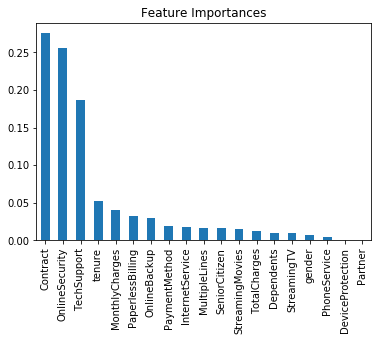

In [75]:
coef1=pd.Series(xgb.feature_importances_,xtrain.columns).sort_values(ascending=False)
coef1.plot(kind='bar',title='Feature Importances')

In [76]:
predictTesXGB=xgb.predict(xtes)
predictProbXGB=xgb.predict_proba(xtes)

In [77]:
conXG=pd.DataFrame(data=confusion_matrix(ytes,predictTesXGB),columns=['P No','P Yes'],index=['A No','A Yes']);
conXG

,P No,P Yes
A No,1447,133
A Yes,253,277


In [78]:
print(classification_report(ytes,predictTesXGB))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1580
           1       0.68      0.52      0.59       530

    accuracy                           0.82      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.81      0.82      0.81      2110



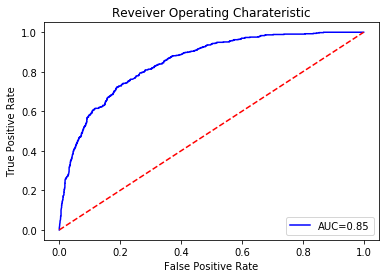

In [79]:
preds=predictProbXGB[:,1]
fpr,tpr,threshold=roc_curve(ytes,preds)
roc_auc=auc(fpr,tpr)

plt.title('Reveiver Operating Charateristic')
plt.plot(fpr,tpr,'b',label='AUC={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
print('log_loss=',roc_auc_score(ytes,predictProbXGB[:,1]))

log_loss= 0.8486040124193934



Train Scores:
[[0.88841675 0.87494535 0.88551831 0.88839079 0.88839079 0.88839079
  0.88839079 0.88839079 0.88839079 0.88839079]
 [0.8748807  0.8710361  0.87457306 0.87229558 0.87623269 0.87937855
  0.87937855 0.87937855 0.87937855 0.87937855]
 [0.86391322 0.86016836 0.86338871 0.8605668  0.86439244 0.86971848
  0.86802245 0.86802245 0.86802245 0.86802245]
 [0.86152678 0.85822522 0.86141492 0.85897571 0.86214281 0.86589271
  0.86126177 0.86285802 0.86034662 0.86034662]
 [0.85968208 0.85775453 0.85927457 0.85793432 0.86048033 0.86398315
  0.85935609 0.86079084 0.86021787 0.8597327 ]]

train Mean: 
[0.88676159 0.87659109 0.86542378 0.86129912 0.85992065]

Train Size: 
[1898 3005 4113 5220 6328]

Train Std: 
[0.00403099 0.00308683 0.00322728 0.00202414 0.00164708]

Test Scores:
[[0.83955668 0.86083327 0.85332906 0.85869295 0.84420988 0.80780272
  0.84354662 0.82801165 0.83865502 0.83941298]
 [0.84624376 0.86069364 0.85419274 0.86172947 0.84598723 0.80740372
  0.84386789 0.82842619 0.8444

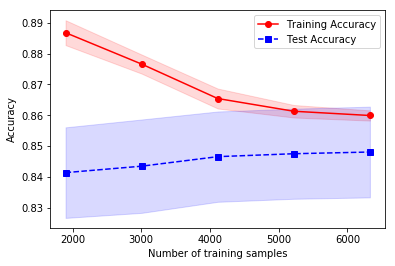

In [81]:
from sklearn.model_selection import learning_curve

train_sizes,train_scores,test_scores=learning_curve(estimator=xgb,
                                                   X=data,
                                                   y=target,
                                                   train_sizes=np.linspace(0.3,1.0,5),
                                                   cv=10,
                                                   scoring='roc_auc')
print('\nTrain Scores:')
print(train_scores)
#Mean value of accuracy against training data
train_mean=np.mean(train_scores,axis=1)
print('\ntrain Mean: ')
print(train_mean)
print('\nTrain Size: ')
print(train_sizes)
#Standard deviation of training accuracy per number of training samples
train_std=np.std(train_scores,axis=1)
print('\nTrain Std: ')
print(train_std)

#Same as data above for test data
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
print('\nTest Scores:')
print(test_scores)
print('\nTest Mean: ')
print(test_mean)
print('\nTest Std: ')
print(test_std)

#Plot training accuracies
plt.plot(train_sizes,train_mean,color='red',marker='o',label='Training Accuracy')
#Plot the variances of training accuracies
plt.fill_between(train_sizes,
                train_mean+train_std,
                train_mean-train_std,
                alpha=0.15,color='red')
#Plot for test data as training data
plt.plot(train_sizes,test_mean,color='blue',linestyle='--',marker='s',
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean+test_std,
                test_mean-test_std,
                alpha=0.15,color='blue')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Business Solution 1
#### Let's say that our company want to know best recall from Churned Client because the cost for promotion is 0

In [82]:
listItem=[]
for item1,item2,item3 in zip(tpr,fpr,threshold):
    listItem.append([item1,item2,item3])
dftpr=pd.DataFrame(columns=['TPR','FPR','Threshold'],data=listItem)
# dftpr[dftpr['Threshold']<0.0382987]
dftpr

,TPR,FPR,Threshold
0,0.000000,0.000000,1.911603
1,0.003774,0.000000,0.911603
2,0.005660,0.000000,0.909354
3,0.009434,0.000000,0.895969
4,0.015094,0.000633,0.888798
5,0.018868,0.001266,0.871573
6,0.022642,0.001266,0.863179
7,0.026415,0.001266,0.862604
8,0.039623,0.002532,0.858775
9,0.045283,0.002532,0.847359


In [83]:
predictTreshold=[]
for item in predictProbXGB:
    if item[1]>=0.038299:
        predictTreshold.append(1)
    else:
        predictTreshold.append(0)
predictTreshold[:5]

[1, 1, 1, 1, 1]

In [84]:
conXG=pd.DataFrame(data=confusion_matrix(ytes,predictTreshold),columns=['P No','P Yes'],index=['A No','A Yes']);
conXG

,P No,P Yes
A No,413,1167
A Yes,6,524


In [85]:
print(classification_report(ytes,predictTreshold))

              precision    recall  f1-score   support

           0       0.99      0.26      0.41      1580
           1       0.31      0.99      0.47       530

    accuracy                           0.44      2110
   macro avg       0.65      0.63      0.44      2110
weighted avg       0.82      0.44      0.43      2110



Churn
0    97055.65
1    39163.10
Name: MonthlyCharges, dtype: float64


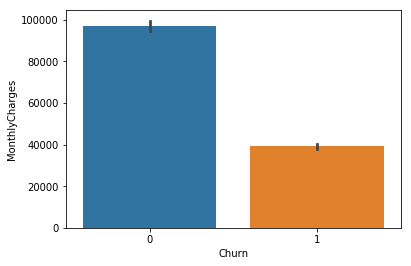

In [86]:
datatest=xtes
datatest['Churn']=ytes
kerugian=datatest.groupby(by='Churn').sum()['MonthlyCharges']
print(kerugian)
sns.barplot(x=target,y=xtes['MonthlyCharges'],estimator=sum)

In [87]:
listItem=[]
for item in zip(predictTreshold,ytes,data['TotalCharges'],data['MonthlyCharges']):
    listItem.append([item[0],item[1],item[2],item[3]])
dfDesc=pd.DataFrame(columns=['Predict','Actual','Total Charges','Monthly Charges'],data=listItem)
dfDesc.head()

,Predict,Actual,Total Charges,Monthly Charges
0,1,0,29.85,29.85
1,1,0,1889.50,56.95
2,1,0,108.15,53.85
3,1,0,1840.75,42.30
4,1,0,151.65,70.70


In [88]:
dfDesc.groupby(by=['Predict','Actual']).sum()

Total Charges  Monthly Charges
Predict Actual                                
0       0           917970.05         26910.75
        1             8357.70           470.35
1       0          2647422.95         76603.30
        1          1249123.75         34108.25

In [89]:
Budget=(kerugian[1]/sum(predictTreshold))
print('Budget Promosi Per Orang: ',Budget)

Budget Promosi Per Orang:  23.15972797161445


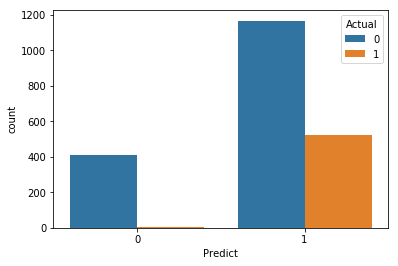

In [90]:
sns.countplot(x=dfDesc['Predict'],hue=dfDesc['Actual'])

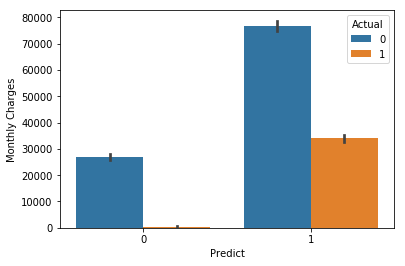

In [91]:
sns.barplot(x=dfDesc['Predict'],y=dfDesc['Monthly Charges'],estimator=sum,hue=dfDesc['Actual'])

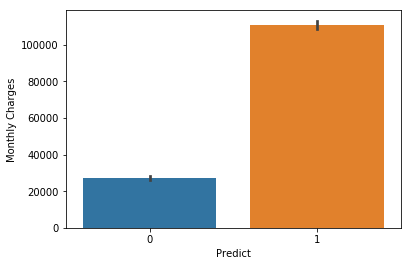

In [92]:
sns.barplot(x=dfDesc['Predict'],y=dfDesc['Monthly Charges'],estimator=sum)

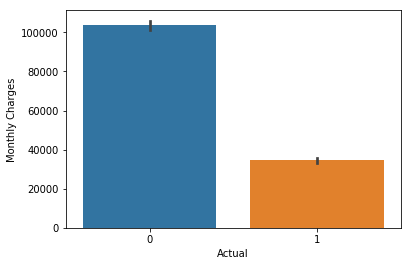

In [93]:
sns.barplot(x=dfDesc['Actual'],y=dfDesc['Monthly Charges'],estimator=sum)

# Business Solution 2
#### The cost for Churned Client is so high so we need precision for Churned Client

In [94]:
dftpr[dftpr['FPR']<0.4]

,TPR,FPR,Threshold
0,0.000000,0.000000,1.911603
1,0.003774,0.000000,0.911603
2,0.005660,0.000000,0.909354
3,0.009434,0.000000,0.895969
4,0.015094,0.000633,0.888798
5,0.018868,0.001266,0.871573
6,0.022642,0.001266,0.863179
7,0.026415,0.001266,0.862604
8,0.039623,0.002532,0.858775
9,0.045283,0.002532,0.847359


In [95]:
predictTreshold=[]
for item in predictProbXGB:
    if item[1]>=0.54:
        predictTreshold.append(1)
    else:
        predictTreshold.append(0)
predictTreshold[:5]

[1, 0, 0, 1, 0]

In [96]:
conXG=pd.DataFrame(data=confusion_matrix(ytes,predictTreshold),columns=['P No','P Yes'],index=['A No','A Yes']);
conXG

,P No,P Yes
A No,1475,105
A Yes,283,247


In [97]:
print(classification_report(ytes,predictTreshold))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1580
           1       0.70      0.47      0.56       530

    accuracy                           0.82      2110
   macro avg       0.77      0.70      0.72      2110
weighted avg       0.80      0.82      0.80      2110



In [98]:
listItem=[]
for item in zip(predictTreshold,ytes,data['TotalCharges'],data['MonthlyCharges']):
    listItem.append([item[0],item[1],item[2],item[3]])
dfDesc=pd.DataFrame(columns=['Predict','Actual','Total Charges','Monthly Charges'],data=listItem)
dfDesc.head()

,Predict,Actual,Total Charges,Monthly Charges
0,1,0,29.85,29.85
1,0,0,1889.50,56.95
2,0,0,108.15,53.85
3,1,0,1840.75,42.30
4,0,0,151.65,70.70


In [99]:
dfDesc.groupby(by=['Predict','Actual']).sum()

Total Charges  Monthly Charges
Predict Actual                                
0       0          3313101.40         96410.95
        1           673262.45         18503.35
1       0           252291.60          7103.10
        1           584219.00         16075.25

In [100]:
Budget=(kerugian[1]/sum(predictTreshold))
print('Budget Promosi Per Orang: ',Budget)

Budget Promosi Per Orang:  111.25880681818192


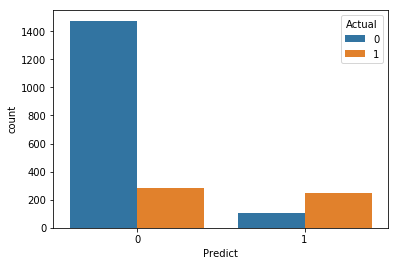

In [101]:
sns.countplot(x=dfDesc['Predict'],hue=dfDesc['Actual'])

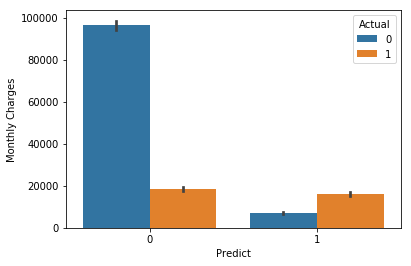

In [102]:
sns.barplot(x=dfDesc['Predict'],y=dfDesc['Monthly Charges'],estimator=sum,hue=dfDesc['Actual'])

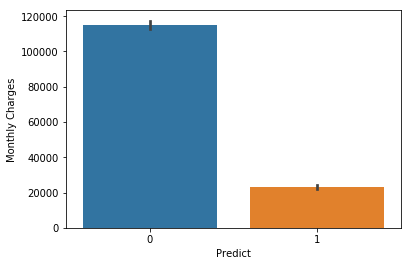

In [103]:
sns.barplot(x=dfDesc['Predict'],y=dfDesc['Monthly Charges'],estimator=sum)

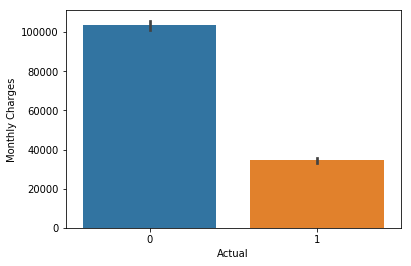

In [104]:
sns.barplot(x=dfDesc['Actual'],y=dfDesc['Monthly Charges'],estimator=sum)

In [105]:
# import pickle
# xgb.fit(data,target)
# with open('XGBModel.pkl','wb') as x:
#     pickle.dump(xgb,x)